In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset.csv')
dataset.head()

,url,Having_subdomains,domain_age,dns_record,web_traffic,page_rank,google_index,nb_hyperlinks,stat_reports,status
0,http://www.progarchives.com/album.asp?id=61737,3,6678,0,78526,5,0,143,1,1
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,10,65,1,106909,0,1,0,1,1
2,http://www.avevaconstruction.com/blesstool/ima...,3,1707,1,113394,0,1,3,1,1
3,http://www.jp519.com/,2,1331,1,6760,0,0,404,-1,0
4,https://www.velocidrone.com/,2,1662,1,312044,4,0,57,-1,0


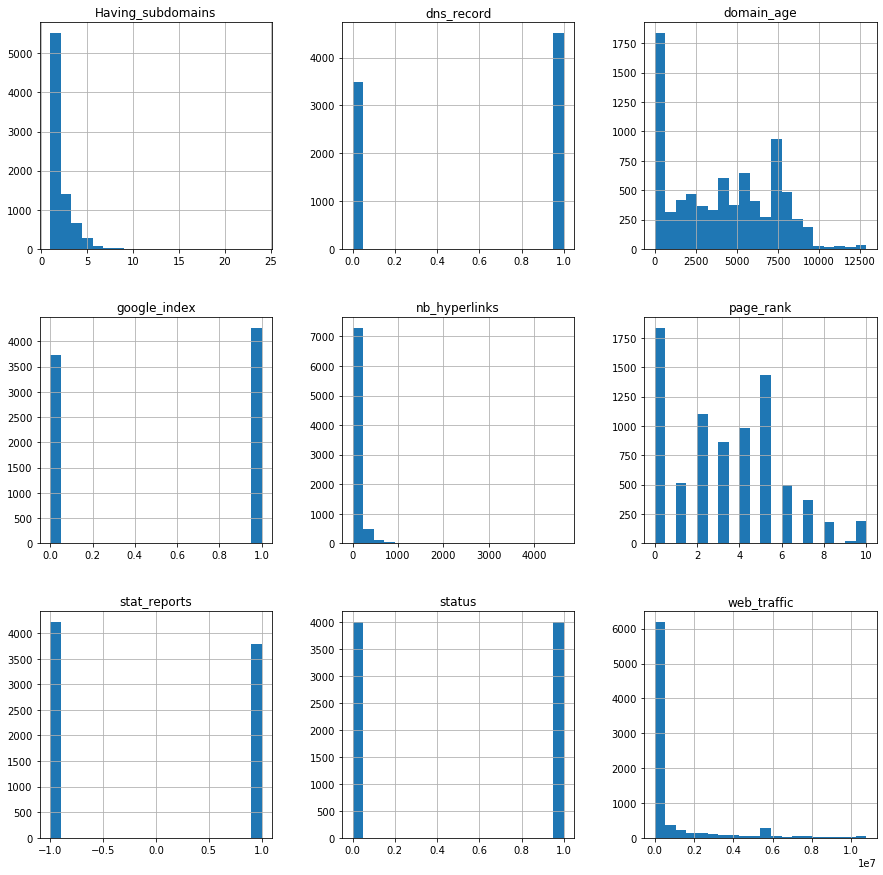

In [21]:
#Plotting the data distribution
dataset.hist(bins = 20,figsize = (15,15))
plt.show()

In [22]:
df1 = dataset[['Having_subdomains','status']]
df1.head()

,Having_subdomains,status
0,3,1
1,10,1
2,3,1
3,2,0
4,2,0


In [23]:
#crosstab to check the website status and page rank.
# to get a better vissualization we will round off the values into nearest 10
# df1_new = df1.copy()

# df1_new.links_in_tags = df1.links_in_tags.round(-1)

cross_tab = pd.crosstab(df1['Having_subdomains'],df1['status']).T
cross_tab

Having_subdomains,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,22,24
status,,,,,,,,,,,,,,,,,,,
0,1206,2084,581,111,13,3,3,0,0,0,0,0,0,0,0,0,0,0,0
1,107,2117,826,558,257,59,26,11,5,3,1,4,6,4,3,1,1,2,7


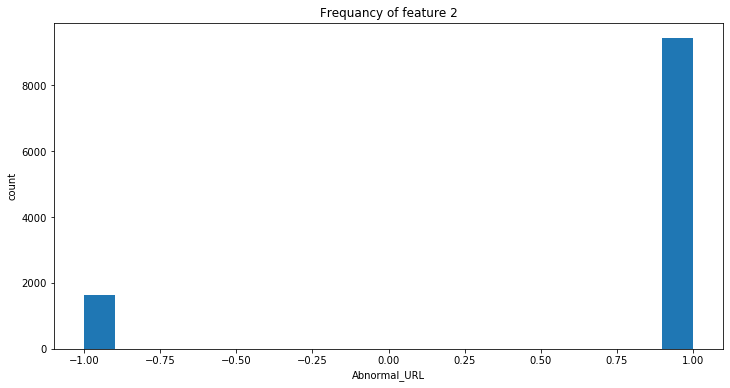

In [9]:
#Let's plot and check the frequency of links_in_tags feature

plt.figure(figsize=(12,6))  
plt.hist(df1['Abnormal_URL'], bins=20)   
plt.title('Frequancy of feature 2')
plt.xlabel('Abnormal_URL')       
plt.ylabel('count')       
plt.show()

In [11]:
#H0 : website status is independent of feature2
#H1 : website status depends on feature2
#Alpha : 0.05
from scipy.stats import chi2_contingency #import chi2_contigency for chi2␣ independency test

alpha = 0.05

stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross_tab)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value is {p_value}\n Website status is Independent of feature2')
else:
  print(f' Reject Null Hypothesis\n P-Value is {p_value}\n Website status depends on feature2')

 Reject Null Hypothesis
 P-Value is 2.4070509148691845e-10
 Website status depends on feature2


In [12]:
phishing_df2 = df1[df1['Result']==-1]  #store all the phishing websites in a phishing
legitimate_df2 = df1[df1['Result']==1]  #store all the legitimate websites in a legitimate
phishing_df2.head()

,Abnormal_URL,Result
0,-1,-1
1,1,-1
2,-1,-1
3,1,-1
6,-1,-1


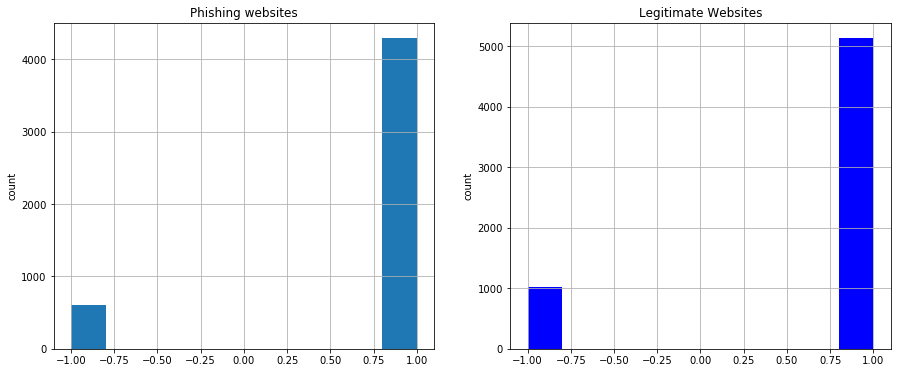

In [14]:
#plot different histograms for phishing and legitmate websites
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

phishing_df2['Abnormal_URL'].hist(ax=ax1)
ax1.set_title('Phishing websites')
ax1.set_ylabel('count')

legitimate_df2['Abnormal_URL'].hist(ax=ax2,color='blue')
ax2.set_title('Legitimate Websites')
ax2.set_ylabel('count')

plt.show()